In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#büyük veri setlerini daha kolay okunabilir hale getirmek için kullanılan kodlar
pd.set_option('display.max_columns',None) #dataframedeki tüm sütunların görüntülenmesini sağlar
pd.set_option('display.width',None) #satırların belirli bir genişliği aşmadan tam olarak görüntülenebilmesini sağlar
pd.set_option('display.float_format',lambda x: '%.2f' % x) #ondalık sayıların virgülden sonraki sadece 2 basamağın görüntülenecek
warnings.simplefilter (action = 'ignore') #çıktılarda yer kaplayacak gereksiz hata mesajlarının yok sayılmasını sağlar

In [65]:
df = pd.read_csv("arabica_data_cleaned.csv")
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.00,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.00,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.00,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.00,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.00,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00


Analizde kullanılmayacak verilerin temizlenmesi

In [50]:
df.drop(columns=["unit_of_measurement","Expiration","Moisture","Quakers","Category.One.Defects","Category.Two.Defects","Owner.1","Mill","Company","Farm.Name","Producer","Owner","Unnamed: 0","Species","Lot.Number","ICO.Number","Number.of.Bags","Bag.Weight","In.Country.Partner","Grading.Date","Certification.Body","Certification.Address","Certification.Contact","altitude_high_meters","altitude_low_meters"],inplace=True)

In [51]:
df.head(3)

,Country.of.Origin,Altitude,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Color,altitude_mean_meters
0,Ethiopia,1950-2200,guji-hambela,2014,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,Green,2075.00
1,Ethiopia,1950-2200,guji-hambela,2014,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,Green,2075.00
2,Guatemala,1600 - 1800 m,NaN,NaN,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,NaN,1700.00


Veri seti hakkında bilgilendirme

In [52]:
def check_df(dataframe):
  print("##################### Shape #####################")
  print(dataframe.shape)
  print("\n##################### Columns #####################")
  print(dataframe.columns)
  print("\n##################### Info #####################")
  dataframe.info()
  print("##################### Types #####################")
  print(dataframe.dtypes)
  print("##################### Head #####################")
  print(dataframe.head())
  print("##################### Tail #####################")
  print(dataframe.tail())
  print("##################### NA #####################")
  print(dataframe.isnull().sum())

check_df(df)

##################### Shape #####################
(1311, 19)

##################### Columns #####################
Index(['Country.of.Origin', 'Altitude', 'Region', 'Harvest.Year', 'Variety', 'Processing.Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup',
       'Sweetness', 'Cupper.Points', 'Total.Cup.Points', 'Color', 'altitude_mean_meters'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1310 non-null   object 
 1   Altitude              1088 non-null   object 
 2   Region                1254 non-null   object 
 3   Harvest.Year          1264 non-null   object 
 4   Variety               1110 non-null   object 
 5   Processing.Method     1159 non-null   object 
 6   Aroma   

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aroma,1311.00,7.56,0.38,0.00,7.42,7.58,7.75,8.75
Flavor,1311.00,7.52,0.40,0.00,7.33,7.58,7.75,8.83
Aftertaste,1311.00,7.40,0.41,0.00,7.25,7.42,7.58,8.67
Acidity,1311.00,7.53,0.38,0.00,7.33,7.50,7.75,8.75
Body,1311.00,7.52,0.36,0.00,7.33,7.50,7.67,8.58
Balance,1311.00,7.52,0.41,0.00,7.33,7.50,7.75,8.75
Uniformity,1311.00,9.83,0.56,0.00,10.00,10.00,10.00,10.00
Clean.Cup,1311.00,9.83,0.77,0.00,10.00,10.00,10.00,10.00
Sweetness,1311.00,9.90,0.53,0.00,10.00,10.00,10.00,10.00
Cupper.Points,1311.00,7.50,0.47,0.00,7.25,7.50,7.75,10.00


Verilerin sınıflandırılması

In [54]:
def column_detection(dataframe: pd.DataFrame, cat_th: int=12, car_th: int=15):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "object"]
  num_but_cat = [col for col in dataframe.columns
                 if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "object"]
  cat_but_car = [col for col in dataframe.columns
                 if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "object"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols
              if col not in cat_but_car] # (?)

  #num_cols
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "object"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print("\n##################### Categoric #####################")
  print(cat_cols)
  print("\n##################### Numeric #####################")
  print(num_cols)
  print("\n##################### Categoric But Cardinal #####################")
  print(cat_but_car)
  print("\n##################### Numeric But Categoric #####################")
  print(num_but_cat)

  print("\n##################### Columns Overview #####################")
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [55]:
 cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['Processing.Method', 'Color', 'Uniformity', 'Clean.Cup', 'Sweetness']

##################### Numeric #####################
['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Cupper.Points', 'Total.Cup.Points', 'altitude_mean_meters']

##################### Categoric But Cardinal #####################
['Country.of.Origin', 'Altitude', 'Region', 'Harvest.Year', 'Variety']

##################### Numeric But Categoric #####################
['Uniformity', 'Clean.Cup', 'Sweetness']

##################### Columns Overview #####################
Observations: 1311
Variables: 19
cat_cols: 5
num_cols: 9
cat_but_car: 5
num_but_cat: 3


In [56]:
#her bir sütundaki benzersiz değerleri getirir
df.nunique()

Country.of.Origin        36
Altitude                383
Region                  343
Harvest.Year             46
Variety                  29
Processing.Method         5
Aroma                    33
Flavor                   35
Aftertaste               35
Acidity                  31
Body                     31
Balance                  32
Uniformity               10
Clean.Cup                11
Sweetness                 8
Cupper.Points            42
Total.Cup.Points        178
Color                     3
altitude_mean_meters    201
dtype: int64

**Flavor**: Kahve tadımı sırasında; kahvenin asiditesi, gövdesi ve aromasının birleşimine denir.

**Aftertaste**: Kahvenin tadımdan hemen sonra ağızda bıraktığı tattır.

**Asidite**: En basit tanımıyla ekşilik anlamına

gelir. Kahve içerisindeki asit miktarının baskınlığını ifade eder.

**Body** (gövde): Kahvenin ağızda bıraktığı ağırlık ve yoğunluk hissidir.

**Cupping**: Kahve konusunda tecrübeli kişilerce yapılan, kahvenin aromasının, asiditesinin, gövdesinin ve lezzetinin değerlendirildiği kahve tadımına denir.

**Balance** (Denge): Kahvede hiçbir tadın, bir diğerini bastıramamasıdır.

**Uniformity**: Kahve çekirdeklerinin boyut, şekil ve rengindeki istikrarlılık veya benzerlik anlamına gelir.

**Sweetness**: Tatlılık hissiyatını ve kahvenin doğal tatlılığını tanımlar.

**Clean Cup**: Kahvenin herhangi bir yabancı tat barındırmadığı anlamına gelir.

                           Processing.Method  Ratio
Processing.Method                                  
Washed / Wet                             812  61.94
Natural / Dry                            251  19.15
Semi-washed / Semi-pulped                 56   4.27
Other                                     26   1.98
Pulped natural / honey                    14   1.07


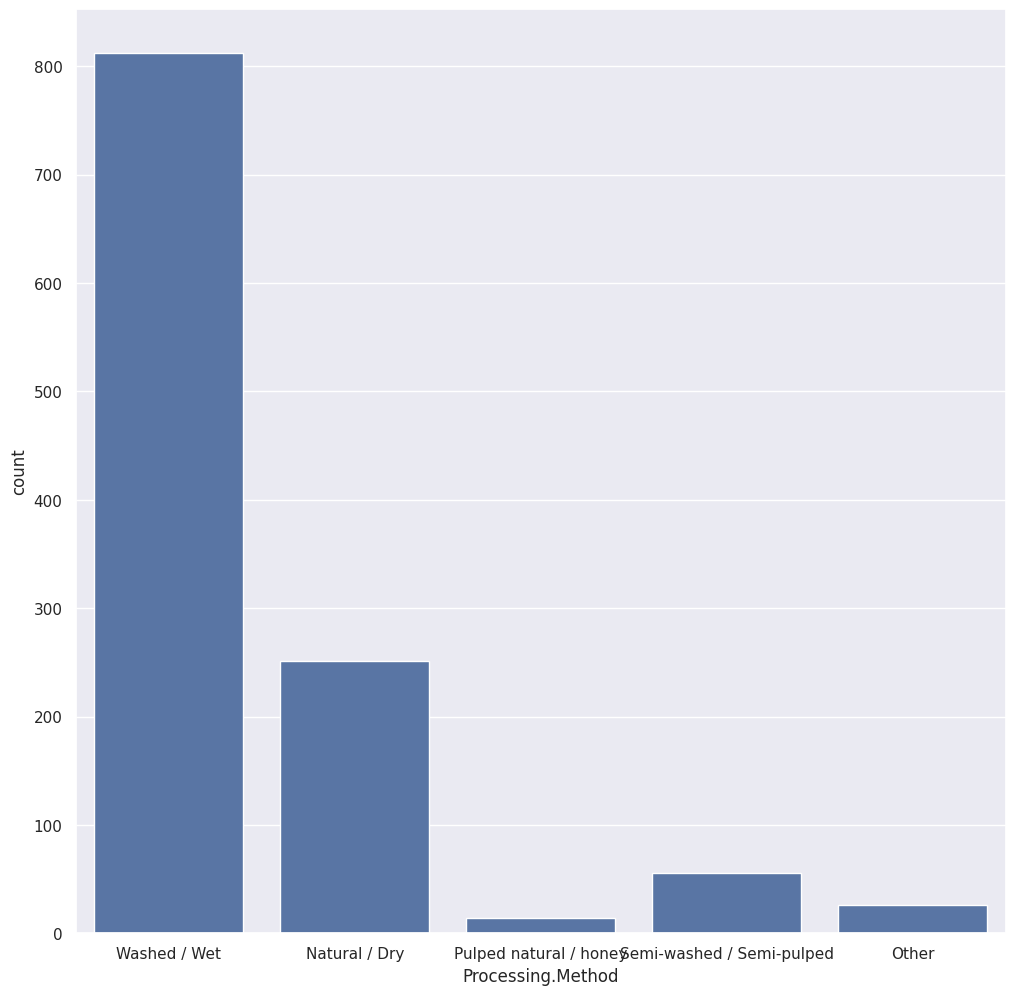

              Color  Ratio
Color                     
Green           850  64.84
Bluish-Green    112   8.54
Blue-Green       82   6.25


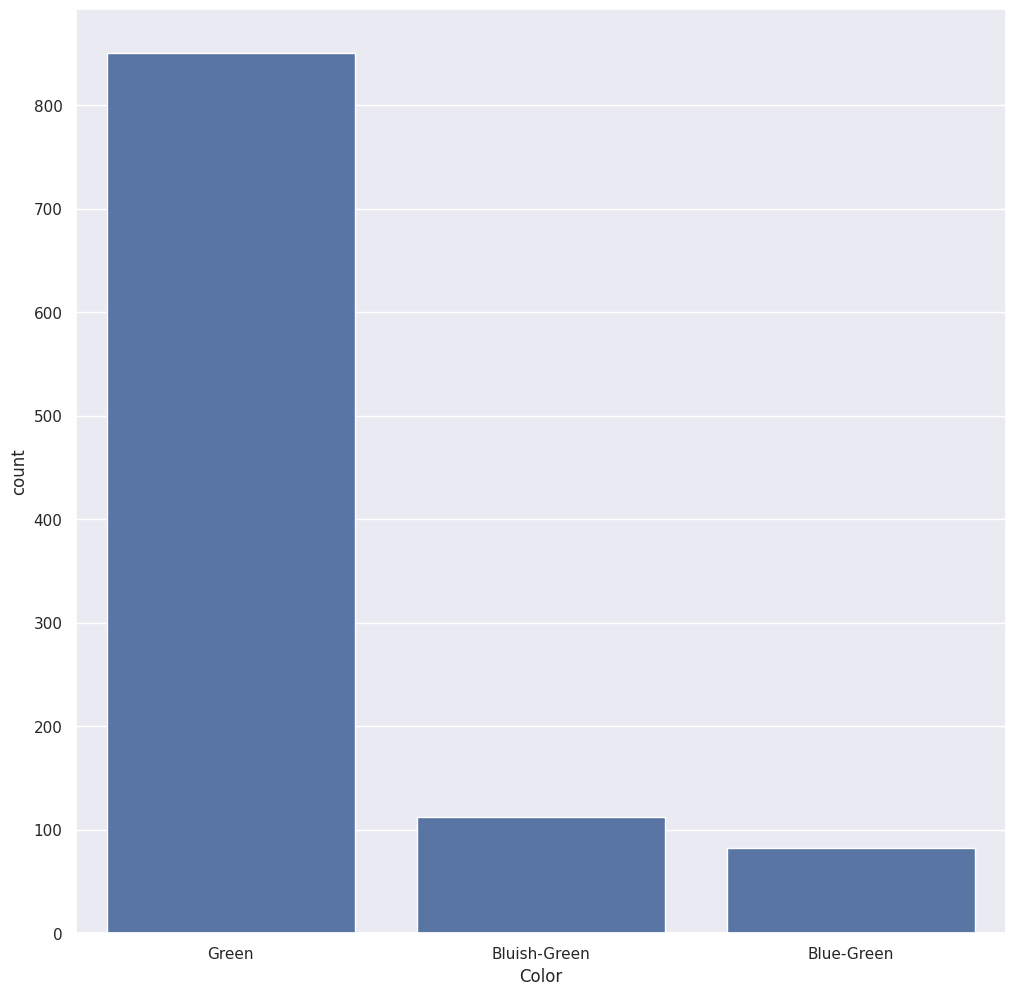

            Uniformity  Ratio
Uniformity                   
10.00             1128  86.04
9.33               112   8.54
8.67                31   2.36
8.00                25   1.91
6.67                 7   0.53
6.00                 3   0.23
7.33                 2   0.15
9.50                 1   0.08
9.00                 1   0.08
0.00                 1   0.08


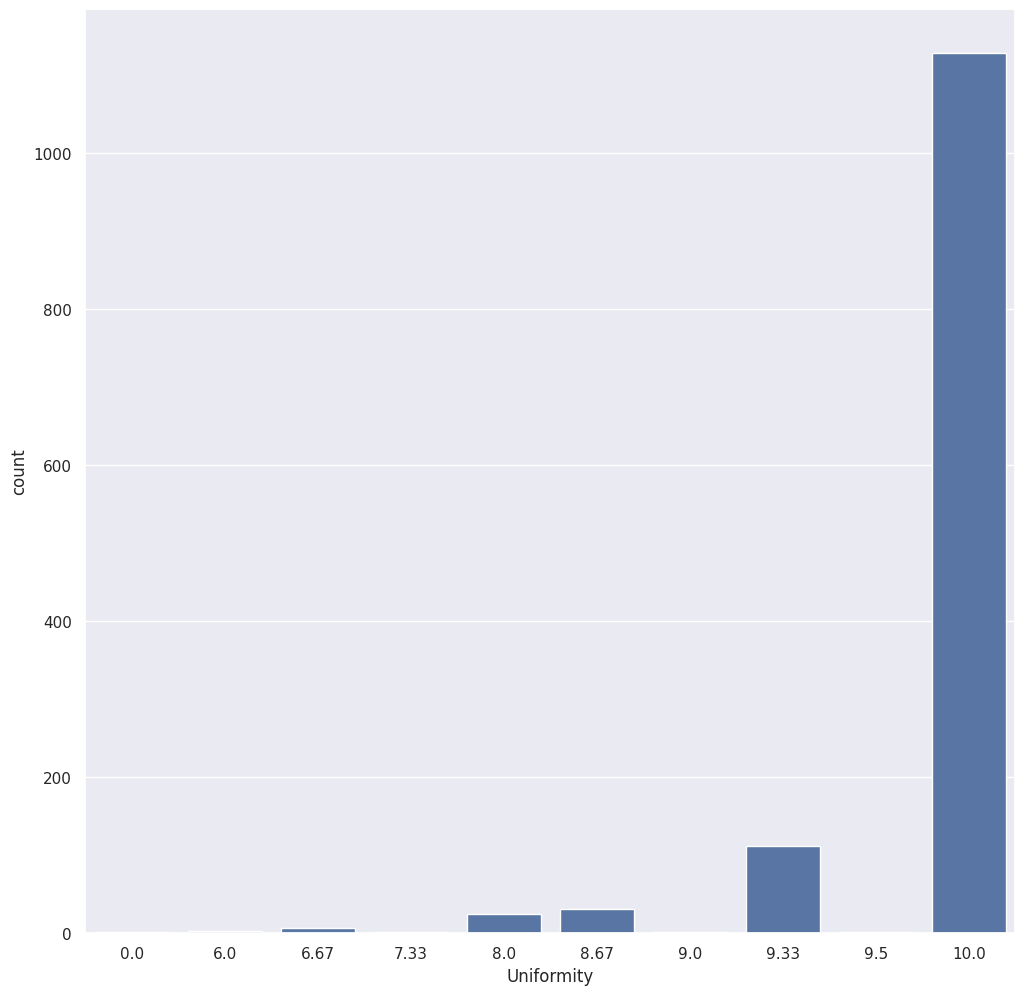

           Clean.Cup  Ratio
Clean.Cup                  
10.00           1194  91.08
9.33              58   4.42
8.67              16   1.22
6.67              13   0.99
8.00              13   0.99
6.00               6   0.46
5.33               3   0.23
7.33               3   0.23
2.67               2   0.15
0.00               2   0.15
1.33               1   0.08


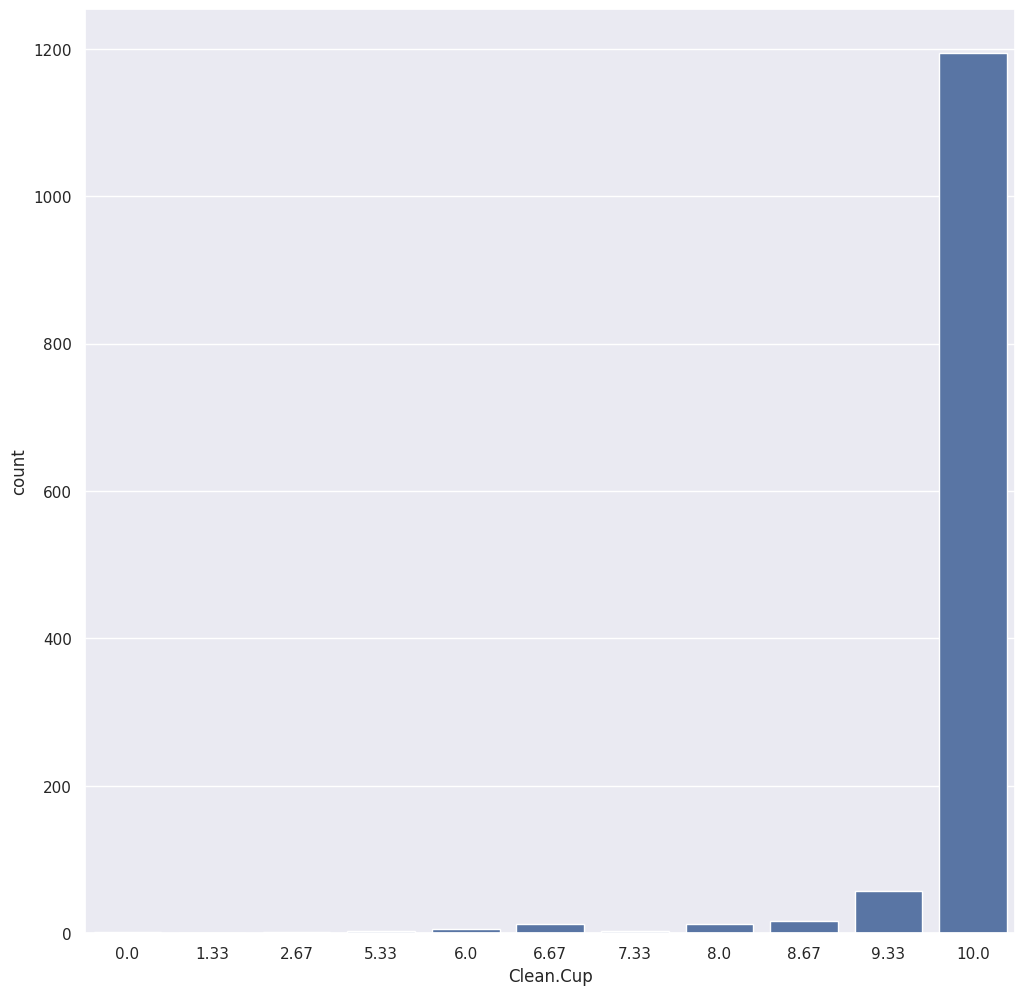

           Sweetness  Ratio
Sweetness                  
10.00           1218  92.91
9.33              61   4.65
8.67              12   0.92
8.00               8   0.61
6.67               7   0.53
6.00               3   0.23
1.33               1   0.08
0.00               1   0.08


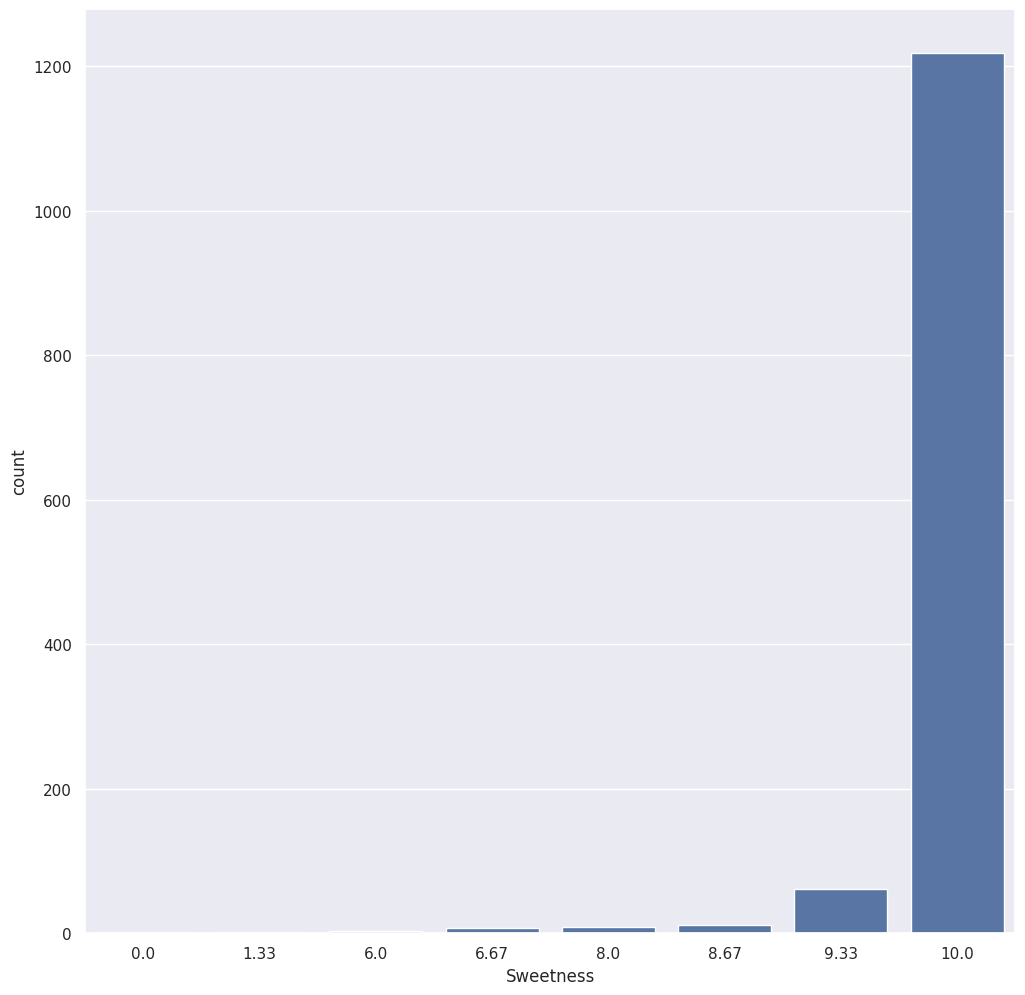

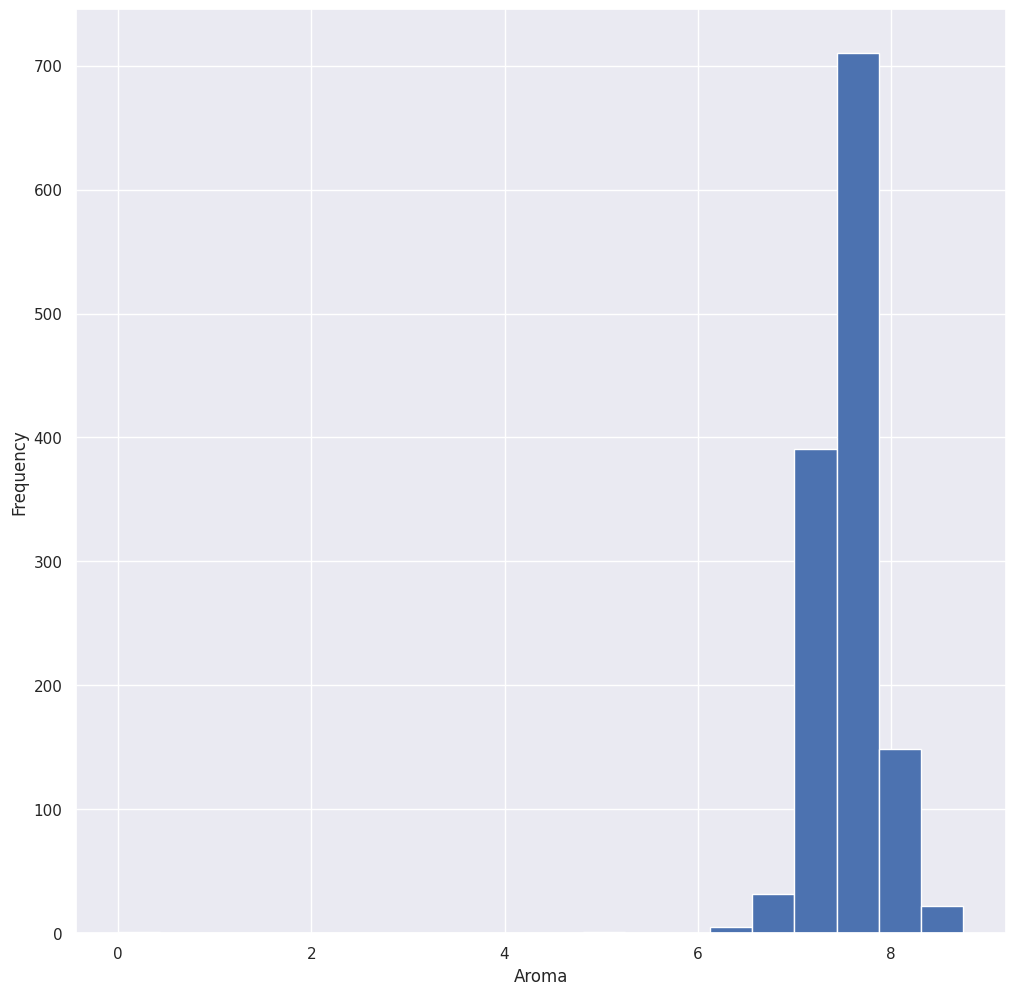

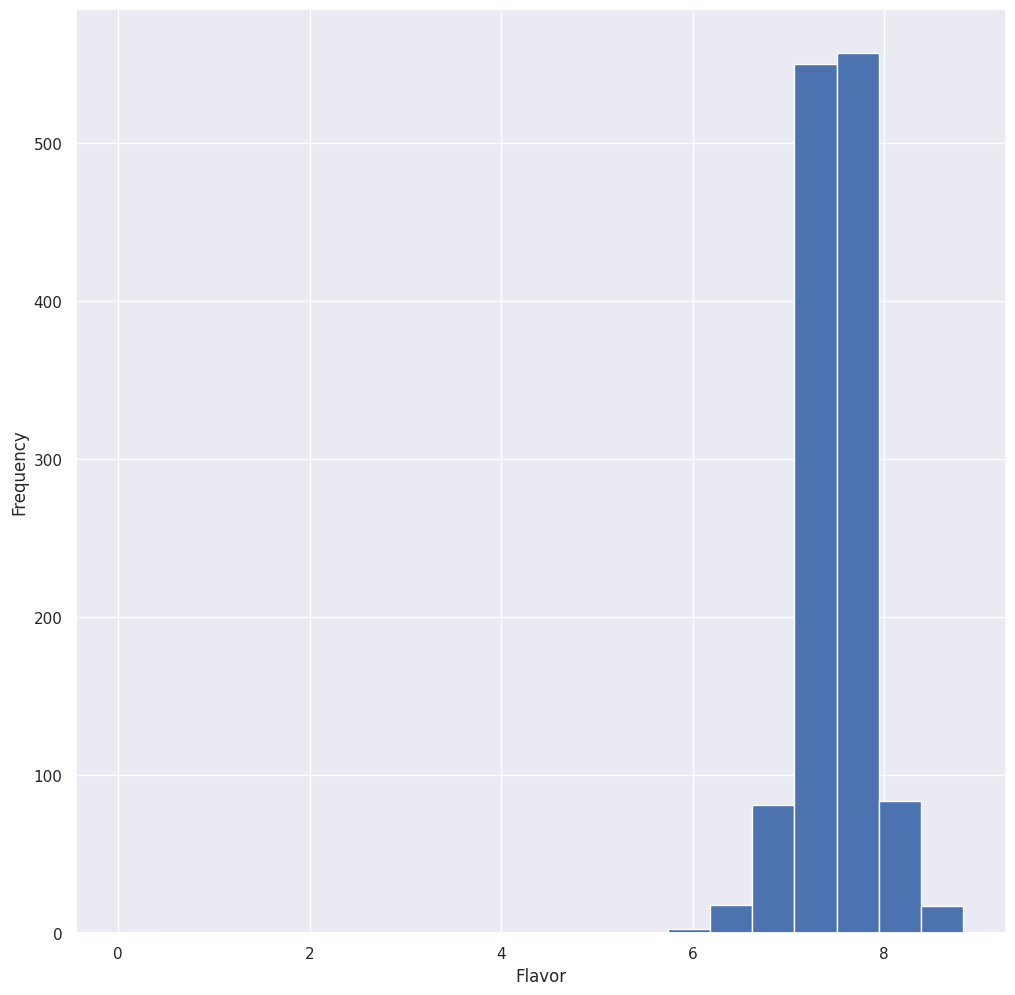

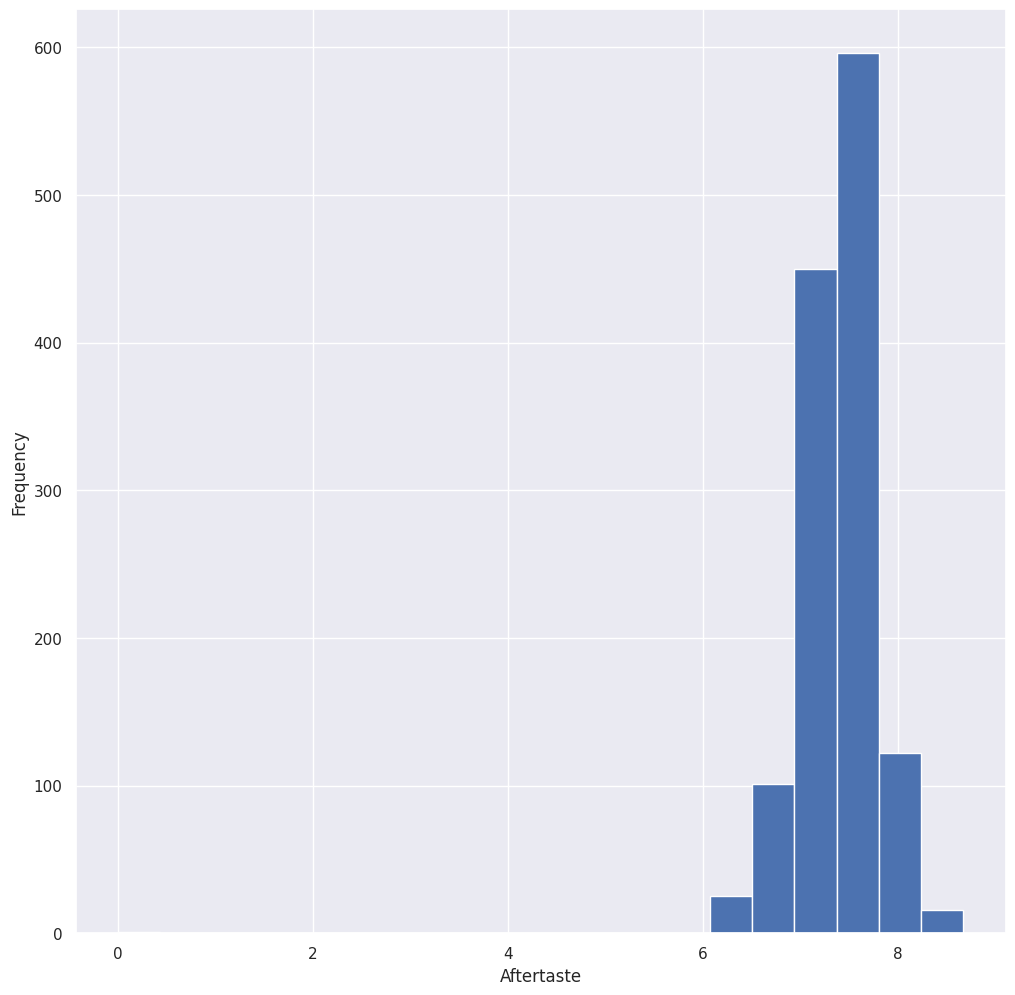

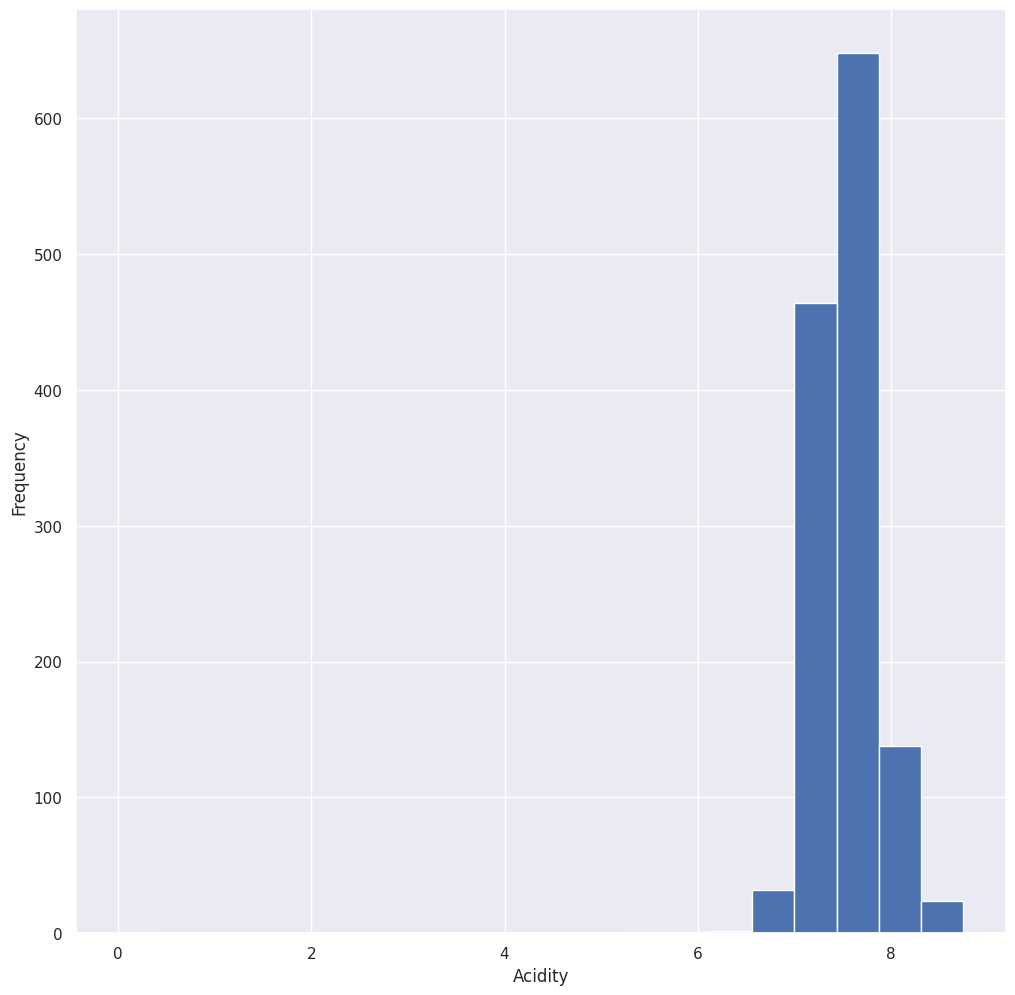

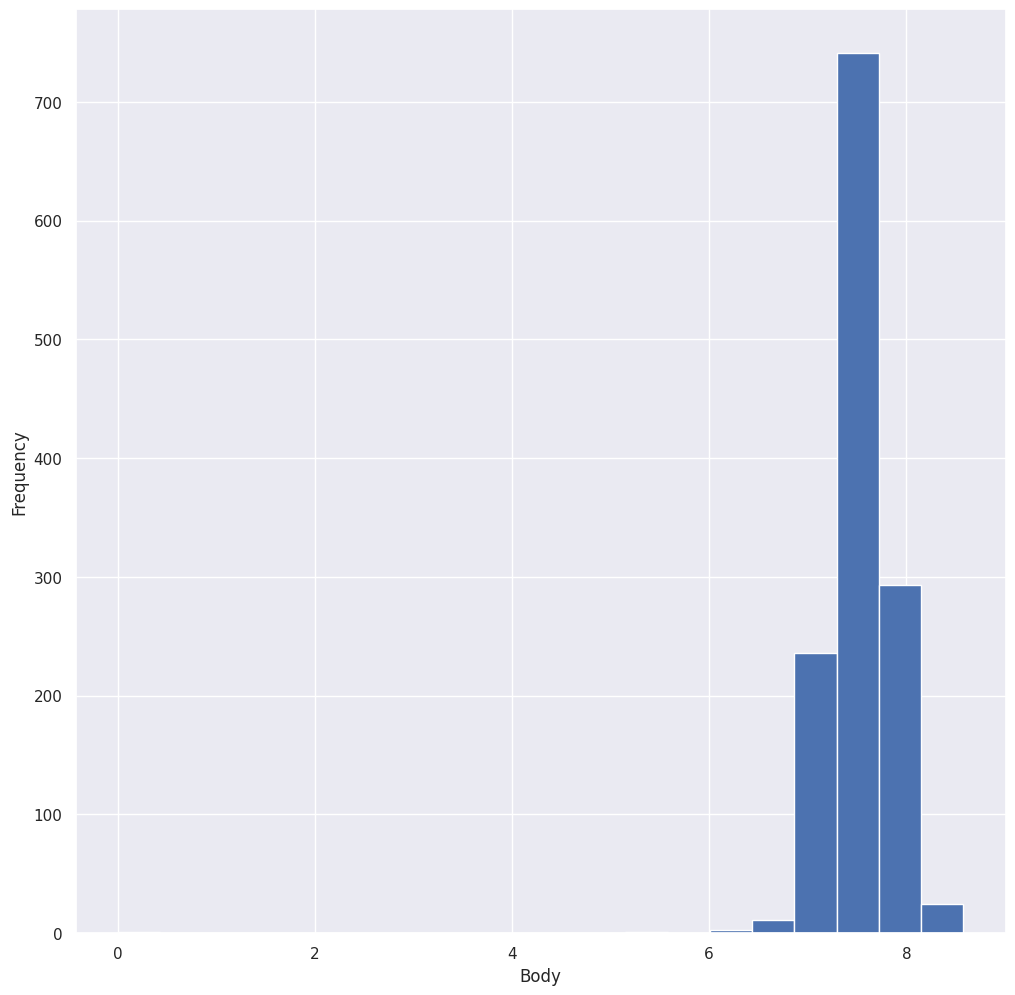

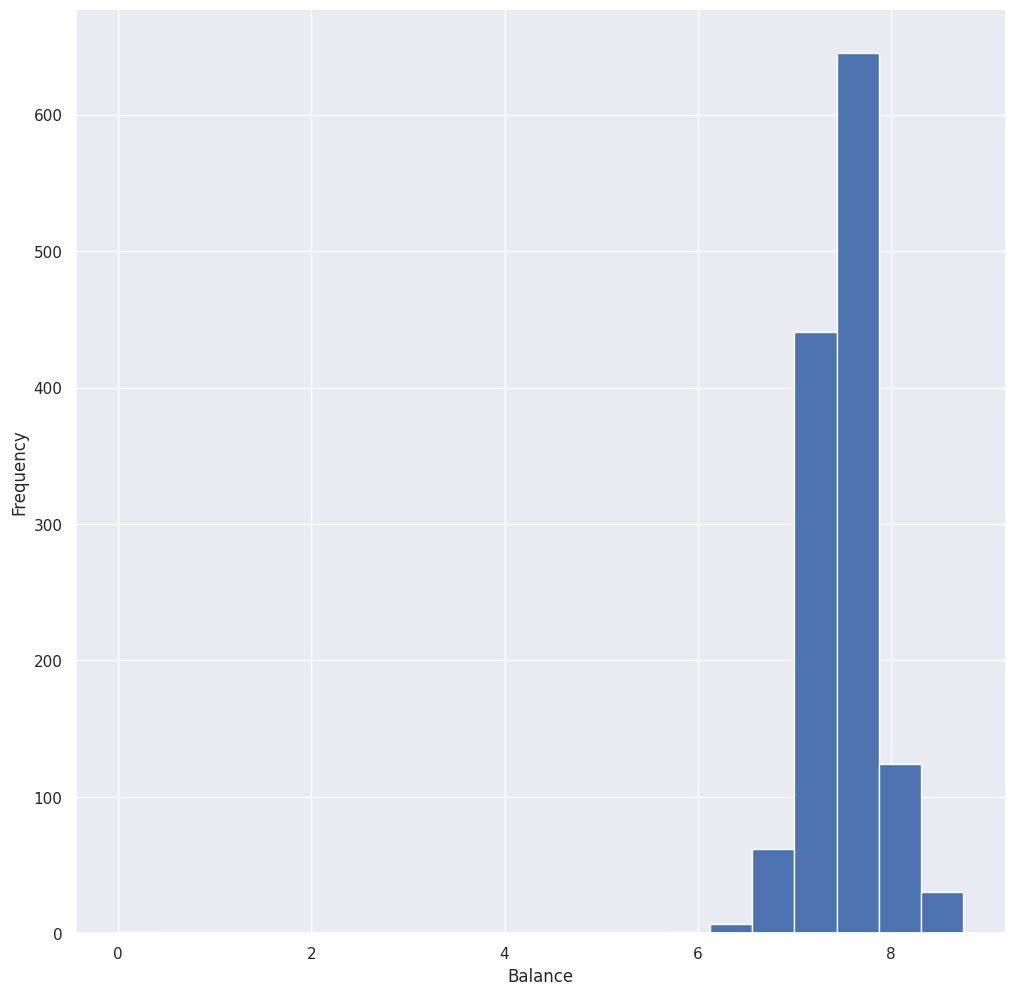

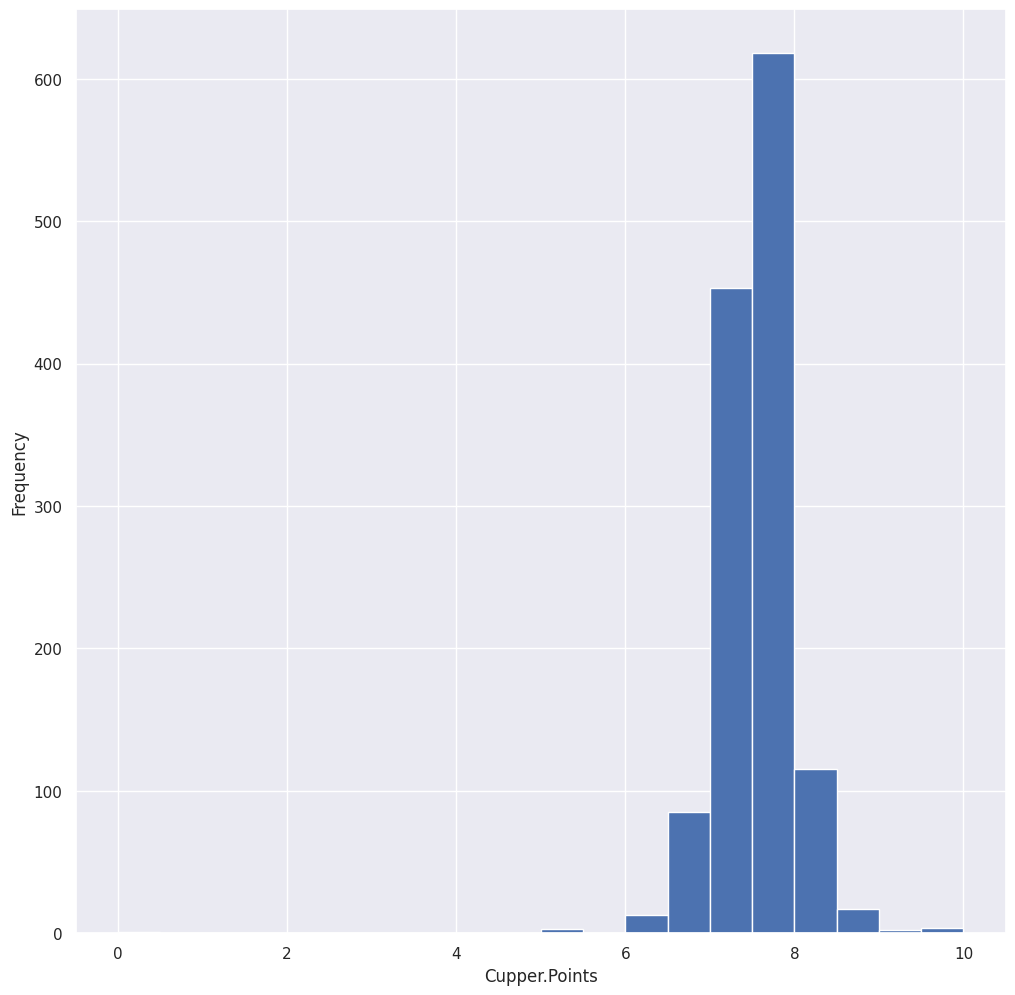

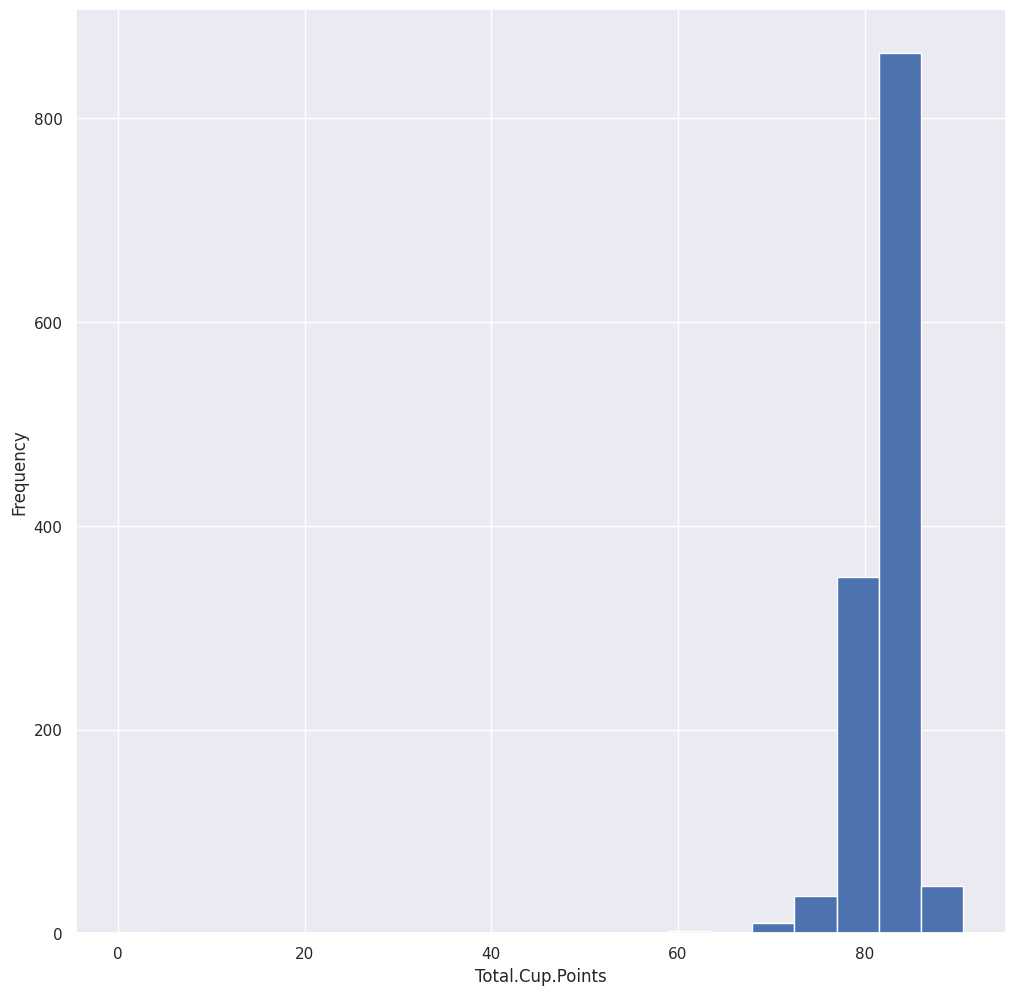

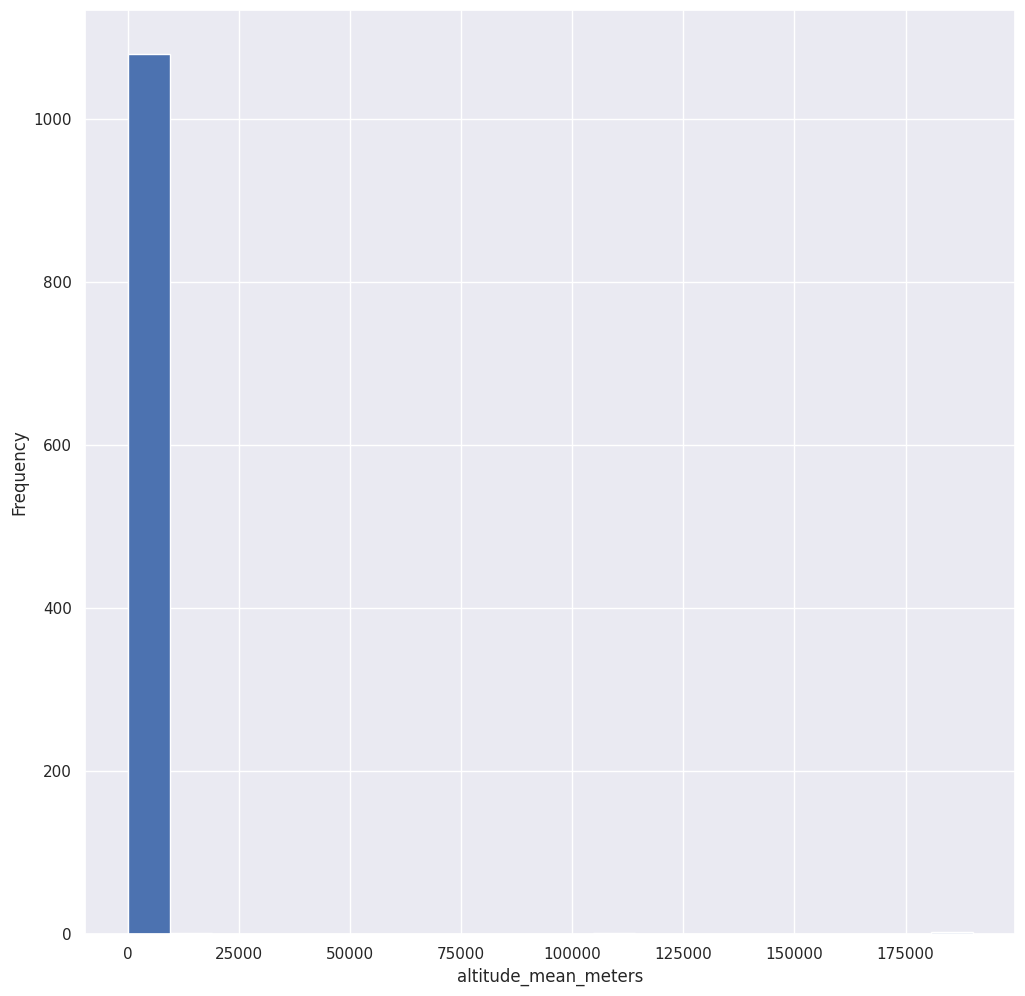

In [57]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

<Axes: xlabel='Acidity', ylabel='altitude_mean_meters'>

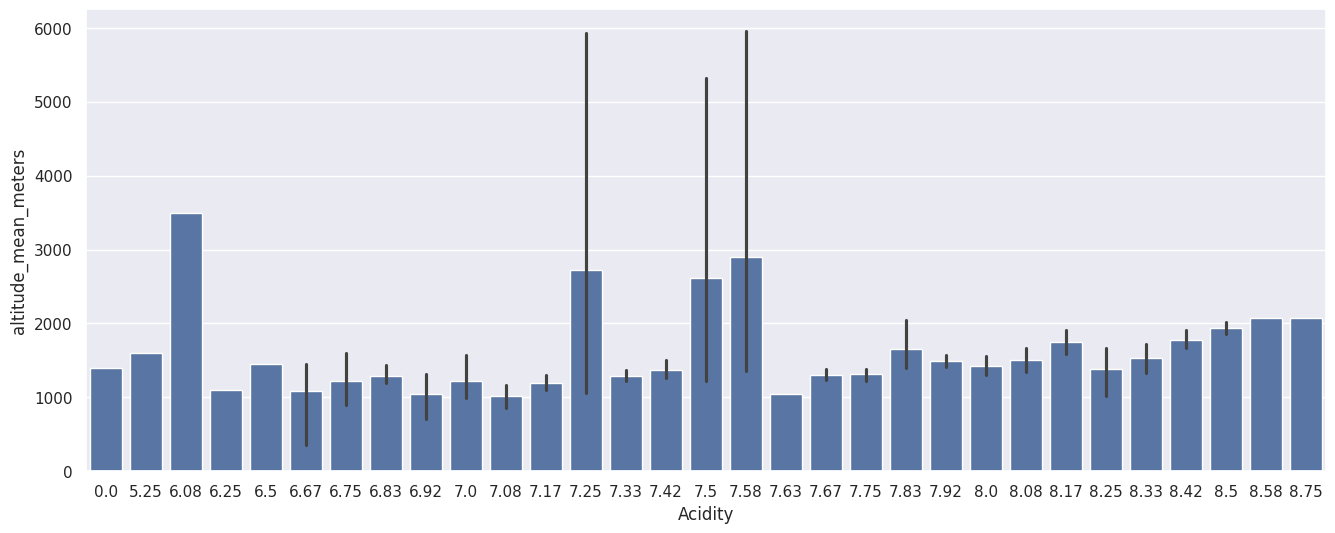

In [59]:
fig = plt.figure(figsize = (16,6))
sns.barplot(x = 'Acidity', y = 'altitude_mean_meters', data = df)

asidite ve yükseklik arasında bir ilişki bulamadım

<Axes: xlabel='Acidity', ylabel='Cupper.Points'>

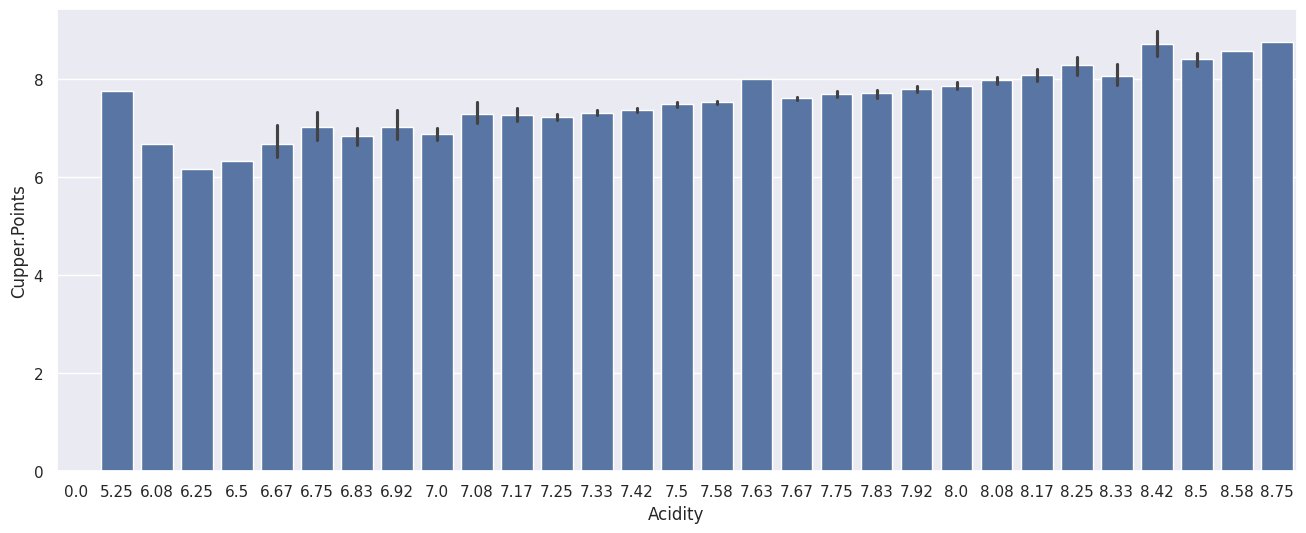

In [60]:
fig = plt.figure(figsize = (16,6))
sns.barplot(x = 'Acidity', y = 'Cupper.Points', data = df)

asidite arttıkça puan artıyor gibi görünüyor

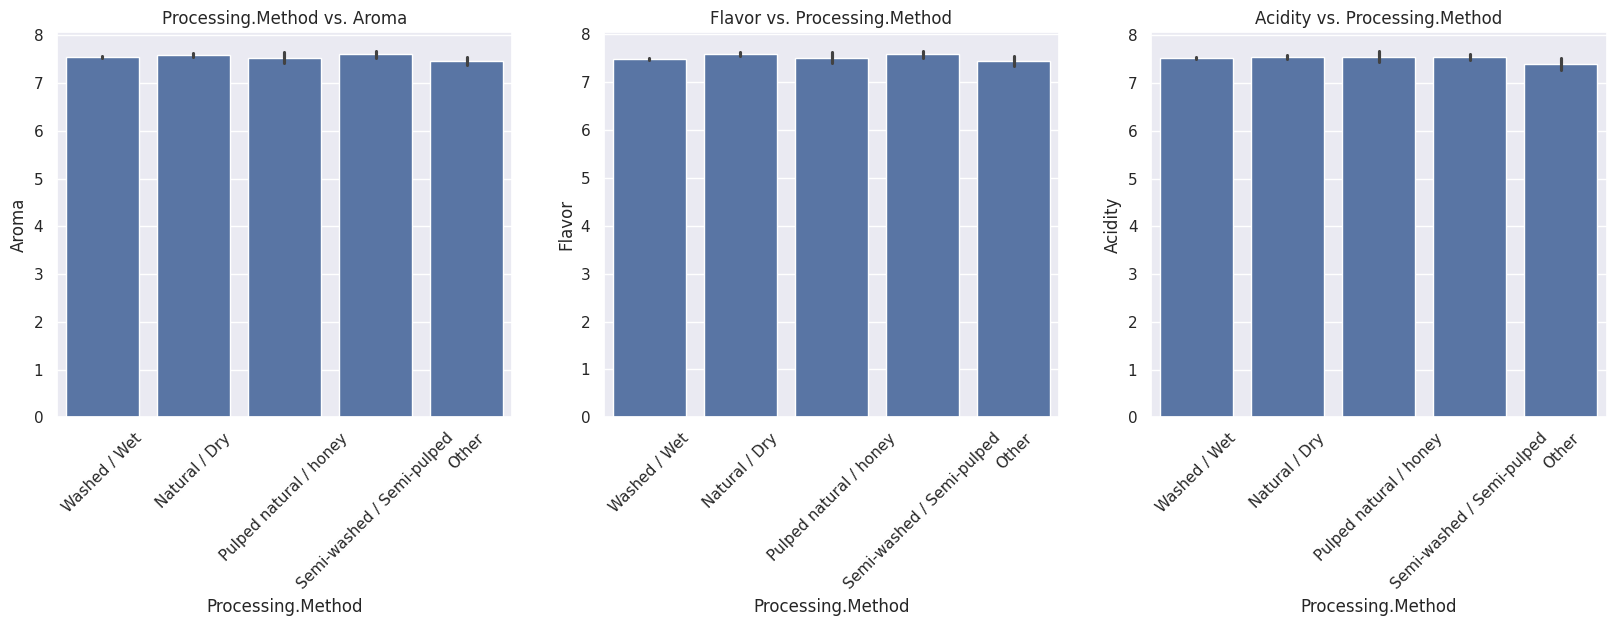

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.barplot(x='Processing.Method', y='Aroma', data=df, ax=axes[0])
axes[0].set_title('Processing.Method vs. Aroma')
axes[0].tick_params(axis='x', rotation=45)  # X ekseni etiketlerini 45 derece döndür

sns.barplot(x='Processing.Method', y='Flavor', data=df, ax=axes[1])
axes[1].set_title('Flavor vs. Processing.Method')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Processing.Method', y='Acidity', data=df, ax=axes[2])
axes[2].set_title('Acidity vs. Processing.Method')
axes[2].tick_params(axis='x', rotation=45)

İşleme metotlarının aroma, flavor, veya asiditeye herhangi bir etkisi yok gibi görünüyor

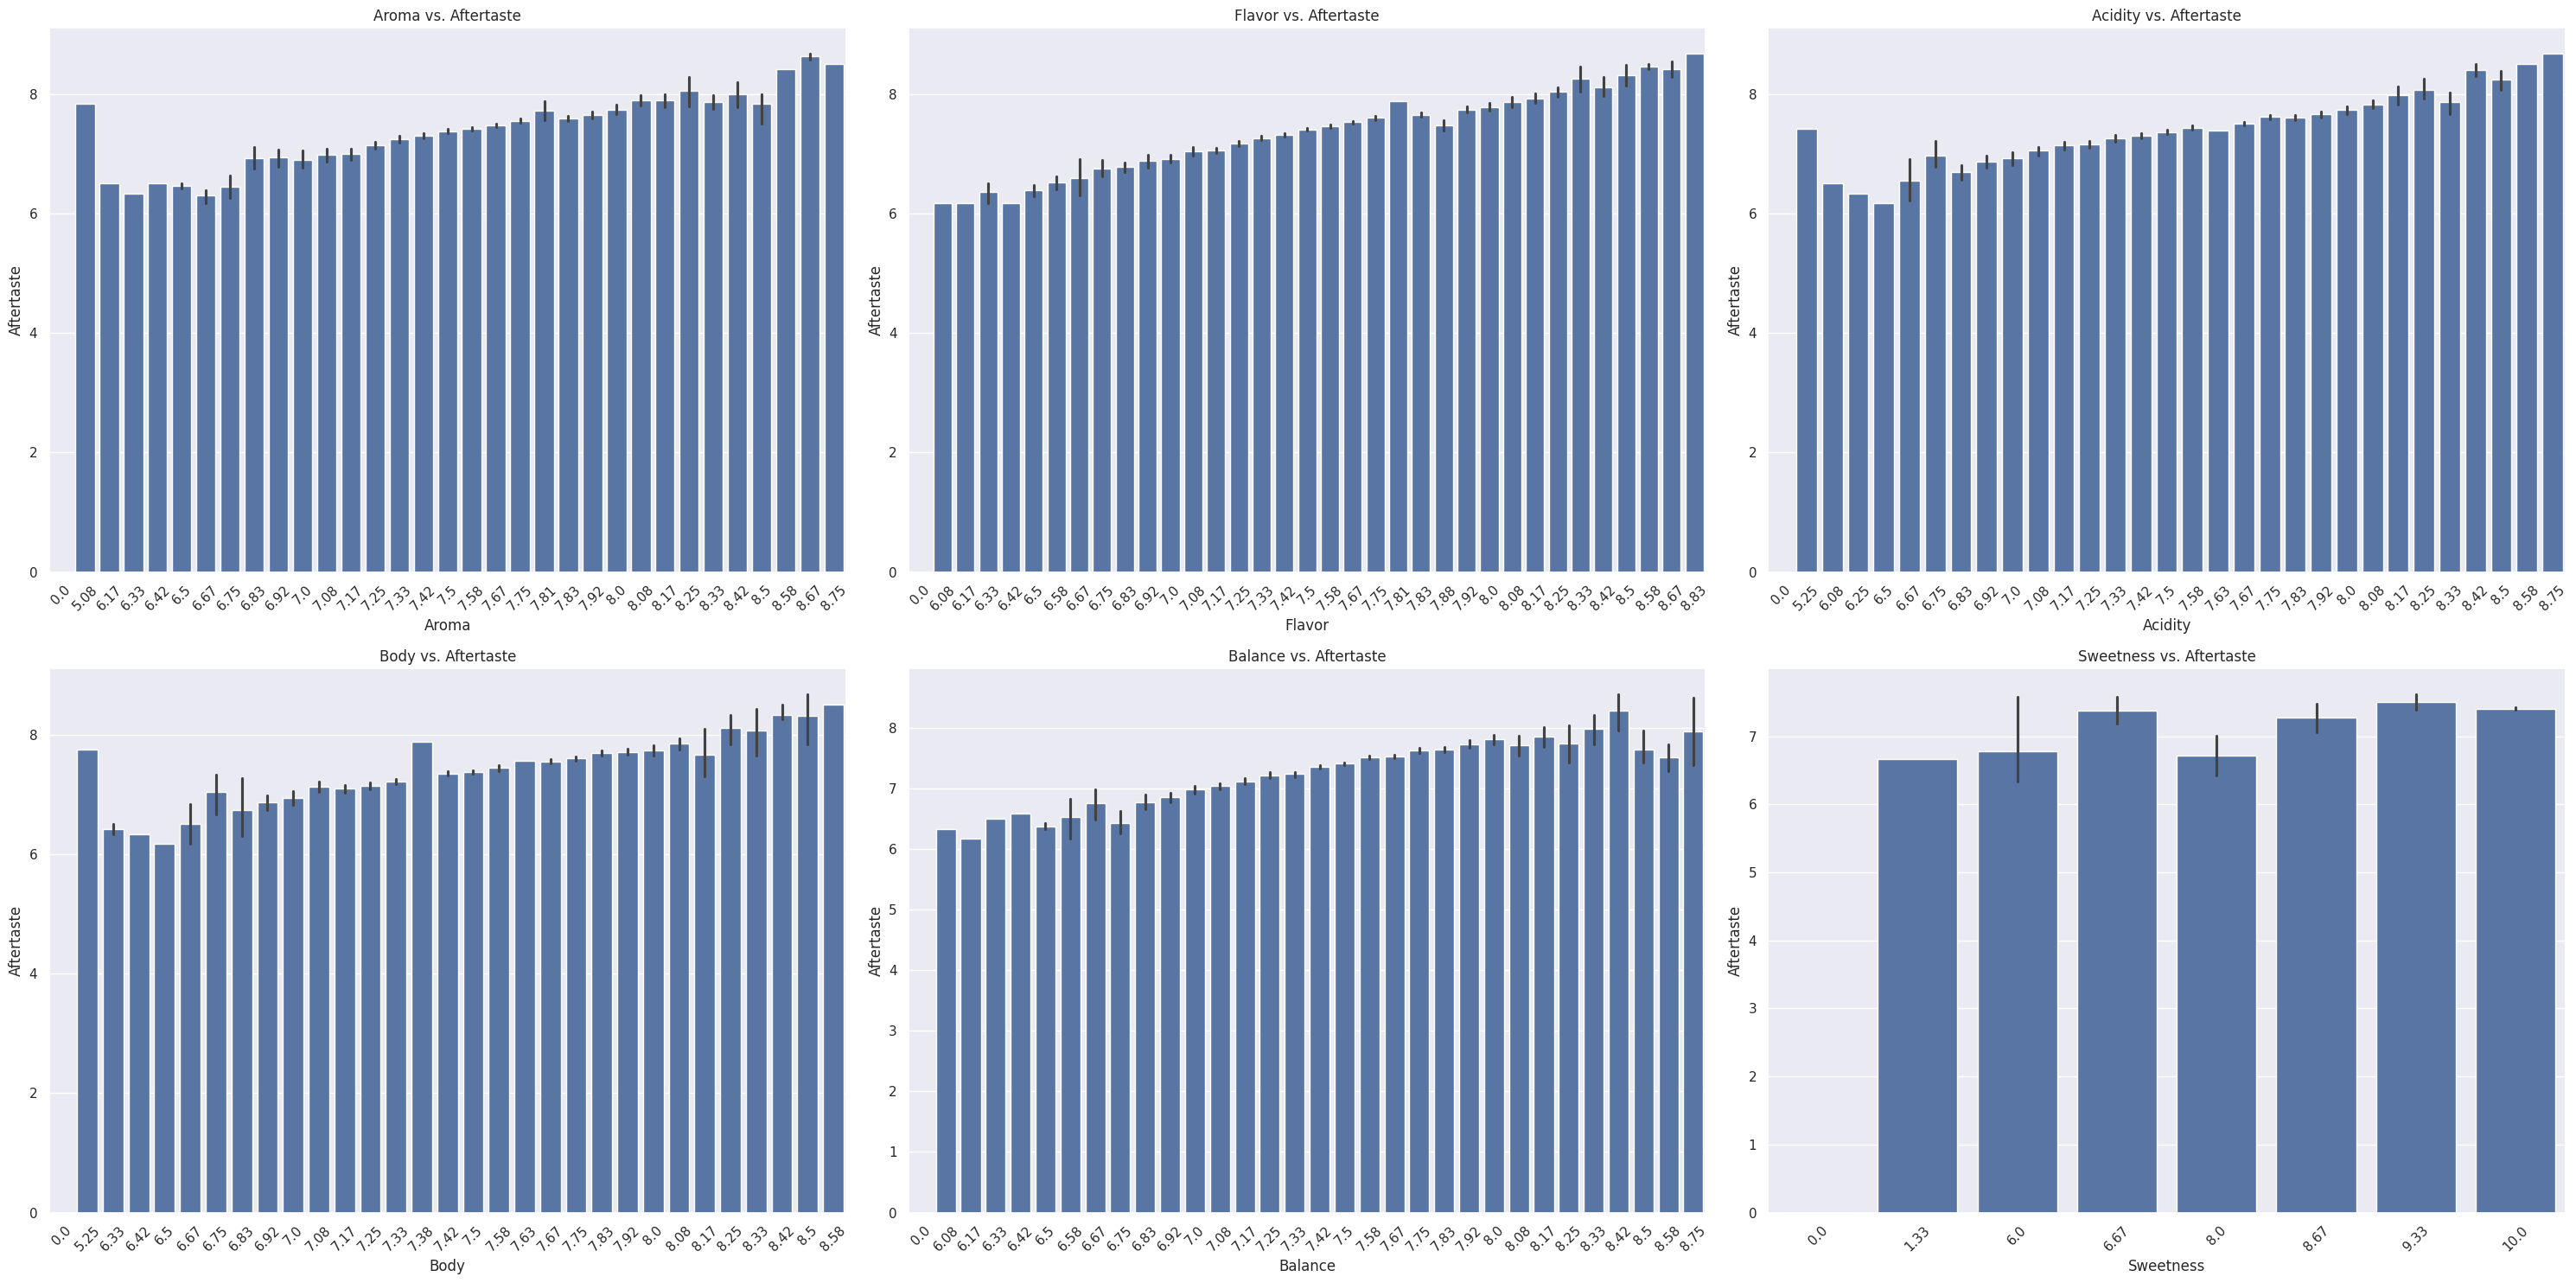

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))  # 2 satır, 3 sütunluk bir çerçeve

sns.barplot(x='Aroma', y='Aftertaste', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Aroma vs. Aftertaste')
axes[0, 0].tick_params(axis='x', rotation=45)  # X ekseni etiketlerini 45 derece döndür

sns.barplot(x='Flavor', y='Aftertaste', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Flavor vs. Aftertaste')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='Acidity', y='Aftertaste', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Acidity vs. Aftertaste')
axes[0, 2].tick_params(axis='x', rotation=45)

sns.barplot(x='Body', y='Aftertaste', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Body vs. Aftertaste')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(x='Balance', y='Aftertaste', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Balance vs. Aftertaste')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.barplot(x='Sweetness', y='Aftertaste', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Sweetness vs. Aftertaste')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Genel olarak kahvenin ağızda bıraktığı tadı diğer özelliklerin etkilediği grafiklerde görünüyor

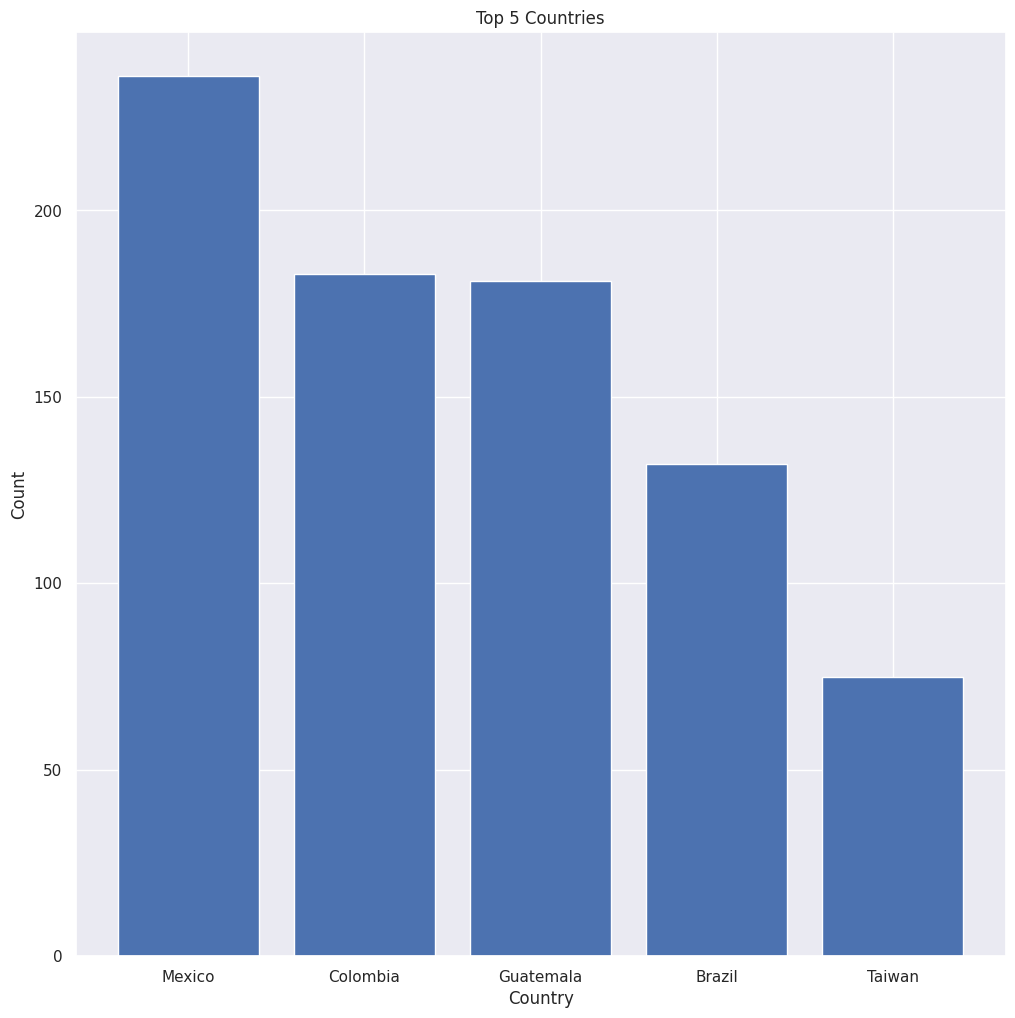

In [69]:
top_countries = df['Country.of.Origin'].value_counts().nlargest(5)

plt.bar(top_countries.index, top_countries.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 5 Countries')
plt.show()

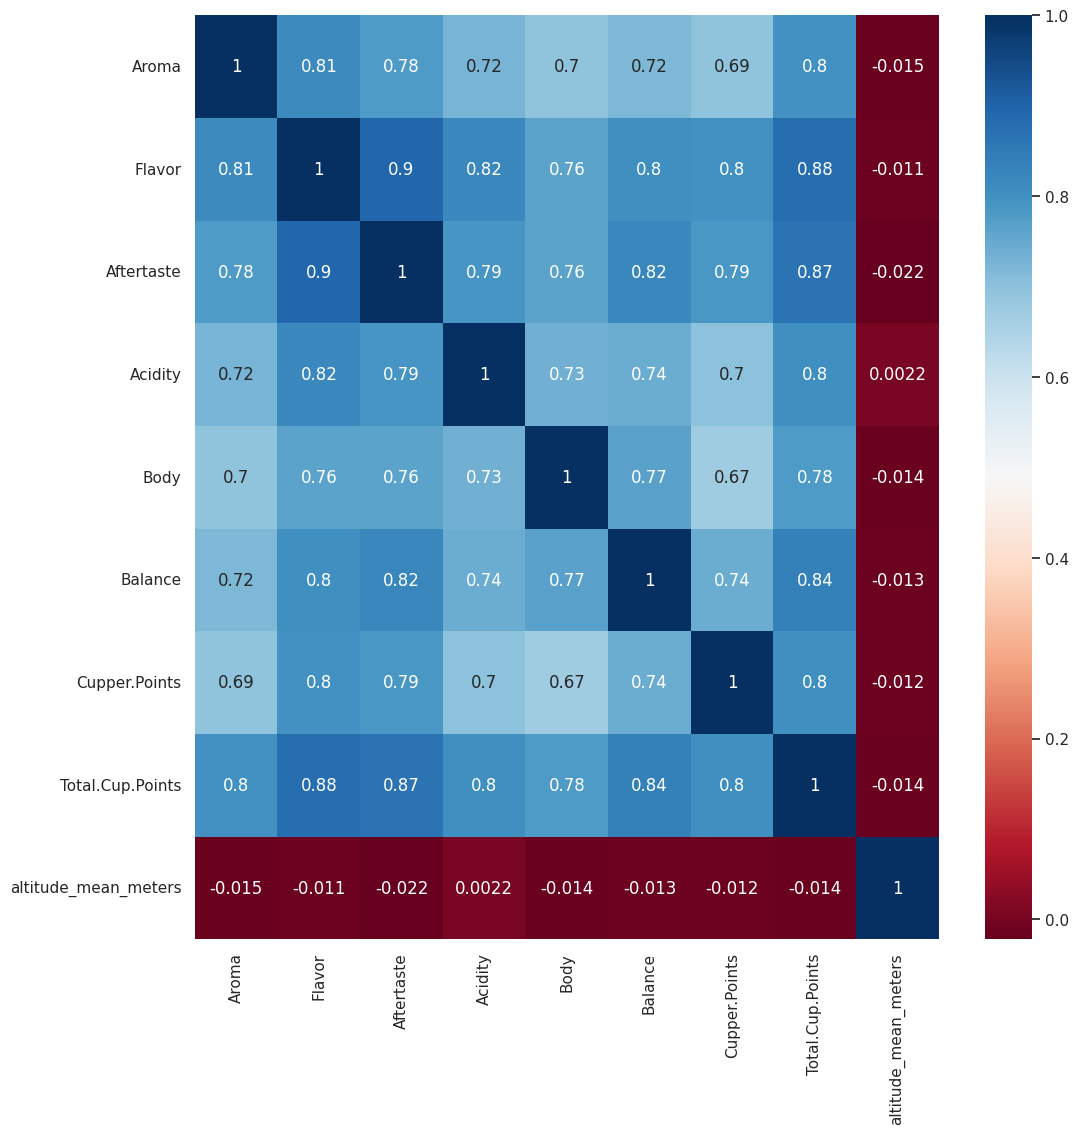

In [64]:
corr = df[num_cols].corr() #nümerik değişkenler arası korelasyonlar

# Korelasyon haritası
sns.set(rc={'figure.figsize': (12,12)})
sns.heatmap(corr, cmap="RdBu", annot=True) # 'annot=True' korelasyon değerlerini gösterir
plt.show()

Kaynakça:
*   https://www.taftcoffee.com/pages/kahve-sozlugu
*   https://www.toproasters.com.tr/post/kahve-terimleri-sozlugu


